# 💼Airfare price prediction✈:

Of course, no one can predict exactly how much the price of a plane ticket will be divided. But we try to predict the price of the air ticket according to the given information.

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#00b3ff;
           font-size:300%;
           font-family:Verdana;   
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:left">Airfare price prediction🎯</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import html5lib

%matplotlib inline

#### Import datasets:

In [2]:
df = pd.read_csv("/content/train_data.csv", index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


This data set includes:

Contents:

ID: Sequence - the numbers set for the sequence.

Airline: Name of the airline operated by.

Flight: Flight ID number.

Source_city: From which city the flight originates.

Departure_time: Flight departure time.

Stop: Number of stops during the flight.

Arrival_time: Return time.

Destination_city: The country to which the flight is departing.

Class: Which class type of aircraft the user flew using.

Duration: Flight duration.

Days_left: How long after the return of the plane

### check dataset content:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


### The number of columns divided into categories:

In [4]:
print(f'Stops: \n\n{df.stops.value_counts()}\n')
print(f'Arrival time:\n\n {df.arrival_time.value_counts()}\n')
print(f"AviaComp: \n\n{df.airline.value_counts()}\n")
print(f"Which country is the flight to:\n\n {df.destination_city.value_counts()}\n")
print(f"From which city does the flight start?: \n\n {df.source_city.value_counts()}\n")

Stops: 

one            16666
zero            2440
two_or_more      894
Name: stops, dtype: int64

Arrival time:

 Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: arrival_time, dtype: int64

AviaComp: 

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

Which country is the flight to:

 Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: destination_city, dtype: int64

From which city does the flight start?: 

 Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: source_city, dtype: int64



<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#00b3ff;
           font-size:300%;
           font-family:Verdana;   
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:left">📈Visualization:</p>
</div>

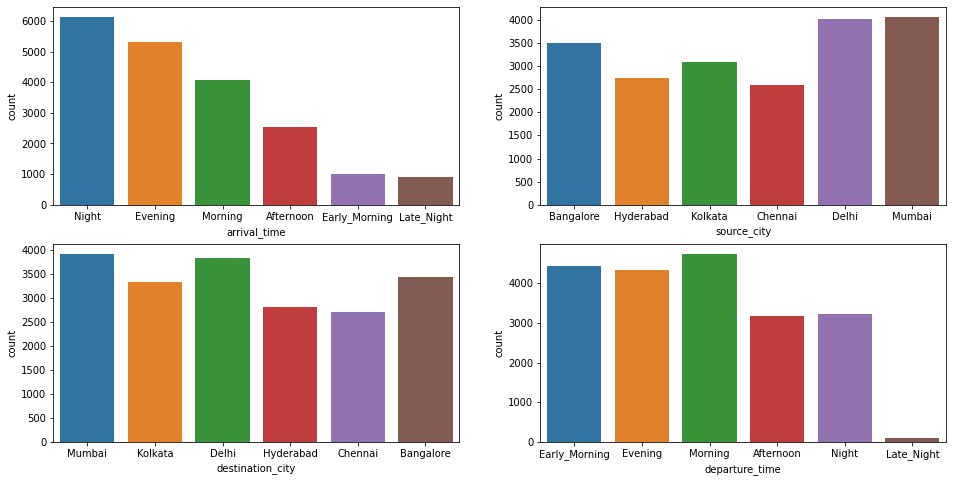

In [5]:
fig, ax = plt.subplots(2,2, figsize=(16,8))


sns.countplot(ax = ax[0,0], data=df, x='arrival_time')
sns.countplot(ax = ax[0,1], data=df, x = 'source_city')
sns.countplot(ax = ax[1,0], data=df, x = 'destination_city')
sns.countplot(ax = ax[1,1], data=df, x = 'departure_time')

plt.show()

`source_city`

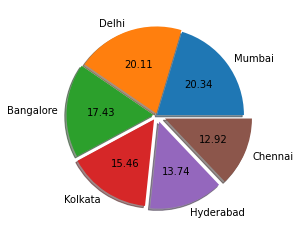

In [6]:
list_sc=list(dict(df.source_city.value_counts()).keys())
data_sc = list(df.source_city.value_counts())


from pandas.core.arrays.interval import value_counts
plt.pie(
    data_sc,
    labels = list_sc,
    explode = [0, 0.02, 0.04, 0.06, 0.08, 0.1],
    autopct='%.2f',
    shadow = True)
plt.show()

`airline`

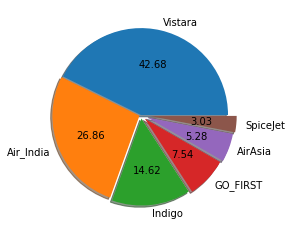

In [7]:
list_al =list(dict(df.airline.value_counts()).keys())
data_al = list(df.airline.value_counts())

plt.pie(
    data_al,
    labels = list_al,
    explode = [0, 0.02, 0.04, 0.06, 0.08, 0.1],
    autopct='%.2f',
    shadow = True)

plt.show()

📝Data cleaning:

### check column `price` .

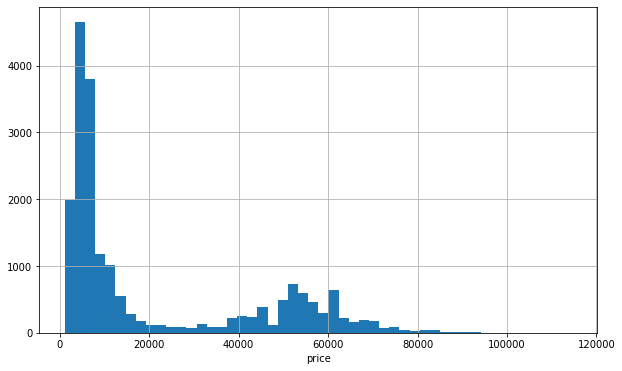

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, histtype='bar')
plt.xlabel('price')
plt.grid()
plt.show()

### Most prices are less than 80000. that's why we discard the lines that are bigger than 80000

In [9]:
df = df[df['price']<80000]

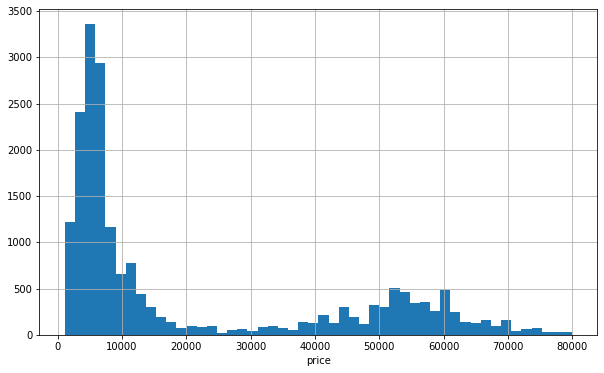

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, histtype='bar')
plt.xlabel('price')
plt.grid()
plt.show()

Update *indexes*:

In [12]:
df.index = list(range(len(df)))

## we split the dataset into two parts. to train and test set. For this we use `StratifiedShuffleSplit`

In [13]:
df['price_cat'] = pd.cut(df['price'], bins = [0, 5000, 10000, 20000, 50000, 80000, np.inf], labels = [1, 2, 3, 4, 5, 6])

from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(df, df['price_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_train_set.drop('price_cat', axis=1, inplace=True)
strat_test_set.drop('price_cat', axis=1, inplace=True)

In [14]:
df_train = strat_train_set.copy()
df_test = strat_test_set.copy()

### We can transfer the values of the text columns to numbers and check the correlation.

In [15]:
# obj columns
df_train_cat = df_train[['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
# num columns
df_train_num = df_train[['duration','days_left']] 

## OrdinalEncoder

In [16]:
from sklearn.preprocessing import OrdinalEncoder
cat_encoder = OrdinalEncoder()
df_cat_encoded = cat_encoder.fit_transform(df_train_cat)
df_cat_encoded

array([[5.000e+00, 1.186e+03, 1.000e+00, ..., 5.000e+00, 5.000e+00,
        0.000e+00],
       [1.000e+00, 6.910e+02, 2.000e+00, ..., 0.000e+00, 4.000e+00,
        1.000e+00],
       [1.000e+00, 5.310e+02, 2.000e+00, ..., 2.000e+00, 4.000e+00,
        1.000e+00],
       ...,
       [2.000e+00, 8.540e+02, 4.000e+00, ..., 2.000e+00, 2.000e+00,
        1.000e+00],
       [1.000e+00, 5.360e+02, 4.000e+00, ..., 2.000e+00, 3.000e+00,
        0.000e+00],
       [5.000e+00, 1.234e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

### We check the correlation by adding the columns `price`, `days_left`, `duration` to the same `df_cat`

In [17]:
df_cat = pd.DataFrame(df_cat_encoded,columns = df_train_cat.columns, index = df_train_cat.index)
df_cat['price'] = df_train['price']
df_cat['days_left'] = df_train['days_left']
df_cat['duration'] = df_train['duration']
df_cat.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,price,days_left,duration
3792,5.0,1186.0,1.0,4.0,0.0,5.0,5.0,0.0,69713,43,11.25
14310,1.0,691.0,2.0,4.0,0.0,0.0,4.0,1.0,4559,24,27.58
369,1.0,531.0,2.0,4.0,0.0,2.0,4.0,1.0,17641,9,7.00
1397,1.0,566.0,2.0,4.0,0.0,5.0,5.0,0.0,53164,43,11.33
2914,1.0,672.0,5.0,1.0,0.0,2.0,4.0,0.0,49725,7,11.17


In [18]:
df_cat.corrwith(df_cat['price']).sort_values(ascending=False)

price               1.000000
flight              0.291334
airline             0.226475
duration            0.215972
departure_time      0.059233
arrival_time        0.042076
source_city         0.008464
destination_city    0.006042
days_left          -0.091782
stops              -0.201906
class              -0.942021
dtype: float64

In [25]:
corr_matrix = df_cat.corr().abs()
corr_matrix.style.background_gradient(cmap='seismic')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,price,days_left,duration
airline,1.000000,0.639660,0.023320,0.053067,0.027900,0.030755,0.037068,0.162699,0.226475,0.022624,0.011130
flight,0.639660,1.000000,0.013321,0.065870,0.112804,0.064710,0.037579,0.244361,0.291334,0.001512,0.197053
source_city,0.023320,0.013321,1.000000,0.013545,0.002085,0.036516,0.234042,0.005826,0.008464,0.001436,0.010330
departure_time,0.053067,0.065870,0.013545,1.000000,0.017414,0.035813,0.008150,0.057898,0.059233,0.008358,0.090829
stops,0.027900,0.112804,0.002085,0.017414,1.000000,0.005930,0.010782,0.092243,0.201906,0.024714,0.482574
arrival_time,0.030755,0.064710,0.036516,0.035813,0.005930,1.000000,0.026371,0.032210,0.042076,0.002032,0.014237
destination_city,0.037068,0.037579,0.234042,0.008150,0.010782,0.026371,1.000000,0.002138,0.006042,0.013927,0.006742
class,0.162699,0.244361,0.005826,0.057898,0.092243,0.032210,0.002138,1.000000,0.942021,0.014580,0.142789
price,0.226475,0.291334,0.008464,0.059233,0.201906,0.042076,0.006042,0.942021,1.000000,0.091782,0.215972
days_left,0.022624,0.001512,0.001436,0.008358,0.024714,0.002032,0.013927,0.014580,0.091782,1.000000,0.020173


In [26]:
df_train.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3792,Vistara,UK-836,Chennai,Morning,one,Night,Mumbai,Business,11.25,43,69713
14310,Air_India,AI-889,Delhi,Morning,one,Afternoon,Kolkata,Economy,27.58,24,4559
369,Air_India,AI-409,Delhi,Morning,one,Evening,Kolkata,Economy,7.00,9,17641


In [27]:
# categorical col
X_train_cat = df_train[['airline','flight','stops','class','source_city','departure_time','arrival_time','destination_city']]
# numerical col
X_train_num = df_train[['duration','days_left']]
# ylabel
y_train = df_train[['price']]
# xlabel
X_train = df_train.drop('price', axis=1)

#### create pipeline

A pipline that works with numerical columns:

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])

### Let's write a generic `pipline' that also works with text columns

full_pipline:

In [29]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
    ('cat', OrdinalEncoder(), cat_attribs),
    ('num', num_pipeline, num_attribs),
])

In [30]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[ 5.00000000e+00,  1.18600000e+03,  0.00000000e+00, ...,
         5.00000000e+00, -1.30422093e-01,  1.25132612e+00],
       [ 1.00000000e+00,  6.91000000e+02,  0.00000000e+00, ...,
         4.00000000e+00,  2.14494186e+00, -1.46288775e-01],
       [ 1.00000000e+00,  5.31000000e+02,  0.00000000e+00, ...,
         4.00000000e+00, -7.22601934e-01, -1.24966895e+00],
       ...,
       [ 2.00000000e+00,  8.54000000e+02,  0.00000000e+00, ...,
         2.00000000e+00, -3.63113936e-01,  1.25132612e+00],
       [ 1.00000000e+00,  5.36000000e+02,  0.00000000e+00, ...,
         3.00000000e+00,  2.45844884e+00,  1.10420876e+00],
       [ 5.00000000e+00,  1.23400000e+03,  0.00000000e+00, ...,
         0.00000000e+00,  4.03236446e-01, -1.10255160e+00]])

# The data is ready for ML

### Machine Learning





## `Linear Regression` 
We create a new model from `LinearRegression` class in sklearn.

In [31]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(X_prepared, y_train)

LinearRegression()

## RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF_model.fit(X_prepared, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

##Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()

Tree_model.fit(X_prepared, y_train)

DecisionTreeRegressor()

## Let's check the model.


### We will use `df_test` which we allocated for testing.

In [35]:
df_test.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10796,Indigo,6E-929,Chennai,Afternoon,one,Night,Kolkata,Economy,8.83,49,4079
17971,GO_FIRST,G8-791,Bangalore,Evening,one,Early_Morning,Mumbai,Economy,11.75,20,5177
2960,Vistara,UK-849,Mumbai,Evening,zero,Evening,Bangalore,Economy,1.75,40,2074


In [36]:
y_test = df_test[['price']]
X_test = df_test.drop('price', axis=1)

`X_test` 👉full_pipline:

In [37]:
y_test['price'].values

array([4079, 5177, 2074, ..., 4764, 5206, 3272])

In [38]:

X_test_prepared = full_pipeline.fit_transform(X_test)

y_predict = RF_model.predict(X_test_prepared)

pd.DataFrame({'Predict':y_predict, 'Original ': y_test['price'].values})

,Predict,Original
0,3193.92,4079
1,5907.85,5177
2,2137.02,2074
3,3390.01,3393
4,4974.25,2622
...,...,...
3968,5011.19,3728
3969,5487.48,4149
3970,5906.84,4764
3971,4827.57,5206


## Checking error:

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test.values, y_predict)
rmse = np.sqrt(mean_squared_error(y_test.values, y_predict))
print(f"MAE = {mae}")
print(f'RMSE = {rmse}')

MAE = 3421.37979520094
RMSE = 5832.081513194464


##Cross-Validation

In [40]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.fit_transform(X)

We can create a simple function to display the validation results

In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

##Random Forest

In [43]:
from sklearn.model_selection import cross_val_score

# predict
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)

# errors
display_scores(RF_rmse_scores)

Scores: [3023.90109379 2630.29166996 3019.44089026 2714.45113055 2841.44832906
 2840.42834561 2812.28186094 2933.67261176 2895.06354169 2806.45645006]
Mean: 2851.7435923667595
Std.dev: 117.50826609936587


#LinearRegression

In [44]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

display_scores(LR_rmse_scores)

Scores: [6606.93280356 6248.21268504 6470.33750377 6287.70609637 6548.8722286
 6552.03795535 6443.69176351 6568.93018082 6571.43923125 6606.66053347]
Mean: 6490.482098174364
Std.dev: 122.21808422364852


# Decision-Tree

In [45]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
DT_rmse_scores = np.sqrt(-scores)

display_scores(DT_rmse_scores)

Scores: [4180.78637545 3606.45126415 4163.16089995 3525.65575678 3689.0816554
 3730.96293036 3958.9075916  3690.44003947 3630.46246118 3645.28806717]
Mean: 3782.1197041522296
Std.dev: 222.12962277190186


## The best model for our practice is `RF_model`.

# save model:


In [46]:
import pickle

filename = 'RF_model_finally.pkl' # file_name
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

## ✔Now we determine `price` according to the data in `test_data`, which we are asked to predict:

In [47]:
df_test_new = pd.read_csv('/content/test_data.csv',index_col=0)
df_test_new.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


## 👉`full_pipline` 👉 `RF_model`:

In [48]:
df_test_prepared = full_pipeline.fit_transform(df_test_new)
df_test_prepared

array([[ 1.00000000e+00,  4.52000000e+02,  0.00000000e+00, ...,
         2.00000000e+00,  2.17930407e+00, -1.75411081e+00],
       [ 5.00000000e+00,  8.34000000e+02,  0.00000000e+00, ...,
         5.00000000e+00,  2.05480508e-01,  5.83184361e-01],
       [ 1.00000000e+00,  4.01000000e+02,  2.00000000e+00, ...,
         1.00000000e+00, -1.41382134e+00,  2.91022465e-01],
       ...,
       [ 1.00000000e+00,  3.44000000e+02,  0.00000000e+00, ...,
         5.00000000e+00, -1.58622867e-01,  8.02305784e-01],
       [ 1.00000000e+00,  4.32000000e+02,  0.00000000e+00, ...,
         3.00000000e+00,  1.37040024e-01,  8.75346258e-01],
       [ 5.00000000e+00,  8.39000000e+02,  0.00000000e+00, ...,
         2.00000000e+00,  5.13462686e-01,  1.67879147e+00]])

### Predict:

In [49]:
df_pred = RF_model.predict(df_test_prepared)
df_pred

array([53099.19, 46738.6 , 24808.39, ..., 52346.  , 52299.43, 48774.28])

In [50]:
answer_df = pd.read_csv("/content/sample_solution.csv",index_col=0)
answer_df['price'] = df_pred.astype(int)

In [51]:
answer_df

,price
id,
1,53099
2,46738
3,24808
4,3274
5,10862
...,...
4996,56919
4997,4477
4998,52346


In [52]:
answer_df.to_csv('submission_data_final.csv')

# Thank you for your attention😊👨‍🎓